In [1]:
import pandas as pd

# Import dataset

In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/archive (26)/housing.csv")

# Preprosessing and Data Cleaning

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.isnull().sum().sum()

207

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

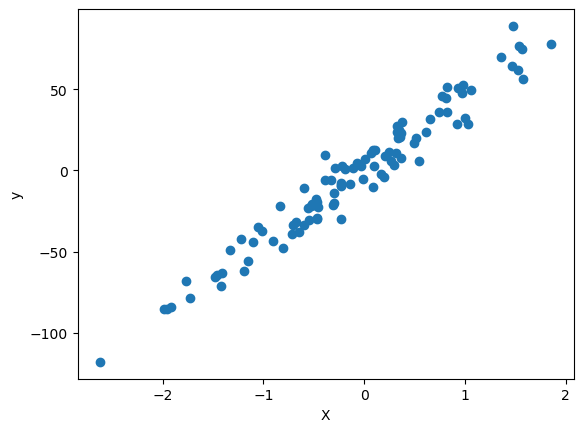

In [43]:
#create a synthetic regression dataset
X,y=make_regression(n_samples=100,n_features=1,noise=10,random_state=42)
#visualize
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [45]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Normalize(using Scaler)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)


#Lasso Regression
lasso=Lasso(alpha=1.0)
lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso.predict(X_test_scaled)

#Ridge Regression
ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)

#ElasticNet Regression
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet.fit(X_train_scaled,y_train)
y_pred_enet=enet.predict(X_test_scaled)

In [48]:
print("Linear Regression :")
print("MSE : ",mean_squared_error(y_test,y_pred_lr))
print("MAE : ",mean_absolute_error(y_test,y_pred_lr))
print("RMSE : ",mean_squared_error(y_test,y_pred_lr,squared=False))
print("R² score : ",r2_score(y_test,y_pred_lr))

print("Lasso Regression :")
print("MSE : ",mean_squared_error(y_test,y_pred_lasso))
print("MAE : ",mean_absolute_error(y_test,y_pred_lasso))
print("RMSE : ",mean_squared_error(y_test,y_pred_lasso,squared=False))
print("R² score : ",r2_score(y_test,y_pred_lasso))

print("Ridge Regression :")
print("MSE : ",mean_squared_error(y_test,y_pred_ridge))
print("MAE : ",mean_absolute_error(y_test,y_pred_ridge))
print("RMSE : ",mean_squared_error(y_test,y_pred_ridge,squared=False))
print("R² score : ",r2_score(y_test,y_pred_ridge))

print("ElecticNet Regression :")
print("MSE : ",mean_squared_error(y_test,y_pred_enet))
print("MAE : ",mean_absolute_error(y_test,y_pred_enet))
print("RMSE : ",mean_squared_error(y_test,y_pred_enet,squared=False))
print("R² score : ",r2_score(y_test,y_pred_enet))

Linear Regression :
MSE :  104.20222653187011
MAE :  8.416659922209048
RMSE :  10.207949183448658
R² score :  0.9374151607623287
Lasso Regression :
MSE :  107.22762085916936
MAE :  8.506123553355183
RMSE :  10.355077057133345
R² score :  0.9355980804185926
Ridge Regression :
MSE :  105.447698050394
MAE :  8.44340306133063
RMSE :  10.268772957388531
R² score :  0.9366671188312085
ElecticNet Regression :
MSE :  318.0706149565831
MAE :  14.040382068453749
RMSE :  17.834534335288463
R² score :  0.808963791218063


C:\Users\DELL\Untitled Folder 1\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\Untitled Folder 1\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\Untitled Folder 1\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\DELL\Untitled Folder 1\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

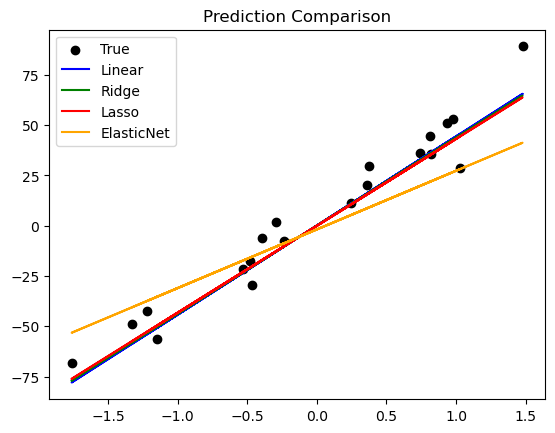

In [49]:
plt.scatter(X_test, y_test, color='black', label='True')
plt.plot(X_test, y_pred_lr, label='Linear', color='blue')
plt.plot(X_test, y_pred_ridge, label='Ridge', color='green')
plt.plot(X_test, y_pred_lasso, label='Lasso', color='red')
plt.plot(X_test, y_pred_enet, label='ElasticNet', color='orange')
plt.title("Prediction Comparison")
plt.legend()
plt.show()


In [50]:
import numpy as np

In [51]:
value = 880.0
user_input_df = pd.DataFrame([[value]], columns=["total_rooms"])
user_scaled = scaler.transform(user_input)
pred = lr.predict(user_scaled)
print(f"Predicted Price: {pred[0]:.2f}")


Predicted Price: 38934.98


# Conclusion

In [ ]:
now how to perform realtime prediction like user will enter input and then it will predict price
